In [1]:
import traffic
import pandas as pd 

In [2]:
carpetaDatos = r'datos_sectores/' # carpeta que contiene los datos
nombreDatos = "datos_bilbao.csv"  # nombre del archivo

## 1. Carga de los datos descargados del sector de Bilbao
Las siguientes celdas muestran el proceso de carga de los datos en una variable del entorno

In [3]:
def cargardatos(carpeta,nombre_datos):
    # carga los datos descargados desde una carpeta
    datos_cargados = traffic.core.Traffic.from_file(carpeta+nombre_datos)
    return datos_cargados
vuelos = cargardatos(carpetaDatos,nombreDatos)

In [4]:
vuelos.data.head()

,Unnamed: 0,alert,altitude,callsign,geoaltitude,groundspeed,hour,icao24,last_position,latitude,longitude,onground,spi,squawk,timestamp,track,vertical_rate
0,0,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:19.800000+00:00,42.334791,-3.236176,False,False,5337.0,2019-02-05 02:10:20+00:00,11.654737,0.0
1,1,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:20.831000064+00:00,42.336467,-3.235665,False,False,5337.0,2019-02-05 02:10:21+00:00,11.654737,0.0
2,2,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:20.831000064+00:00,42.336467,-3.235665,False,False,5337.0,2019-02-05 02:10:22+00:00,11.654737,0.0
3,3,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:22.258999808+00:00,42.338376,-3.235154,False,False,5337.0,2019-02-05 02:10:23+00:00,11.654737,0.0
4,4,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:22.258999808+00:00,42.338376,-3.235154,False,False,5337.0,2019-02-05 02:10:24+00:00,11.654737,0.0


In [5]:
vuelos.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111087 entries, 0 to 2111086
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   alert          bool   
 2   altitude       float64
 3   callsign       object 
 4   geoaltitude    float64
 5   groundspeed    float64
 6   hour           object 
 7   icao24         object 
 8   last_position  object 
 9   latitude       float64
 10  longitude      float64
 11  onground       bool   
 12  spi            bool   
 13  squawk         float64
 14  timestamp      object 
 15  track          float64
 16  vertical_rate  float64
dtypes: bool(3), float64(8), int64(1), object(5)
memory usage: 231.5+ MB


In [6]:
vuelos_prueba = vuelos # generamos otros df de vuelos para poder editarlo sin perder los datos originales

# 2. Filtrado de los datos bajos condiciones explícitas
Como se ha explicado, los datos deben filtrarse bajo ciertas condicones para asegurar que son los que se buscan para generar las base de datos. Las condiciones del sector elegido implica que:
1. Las aeronaves no pueden estar en tierra
2. Las aeronaves no pueden estar cambiano de nivel de vuelo
3. Las aeronaves deben estar sobre el FL 345


In [7]:
# 1. Las aeronaves no pueden estar en tierra
aviones_entierra =  vuelos_prueba.data[vuelos_prueba.data["onground"] == True].index
vuelos_prueba.data.drop(aviones_entierra,inplace = True)

In [8]:
# 2. Las aeronaves no pueden estar cambiano de nivel de vuelo
aviones_cambiandoFL = vuelos_prueba.data[vuelos_prueba.data["vertical_rate"]!= 0.0].index
vuelos_prueba.data.drop(aviones_cambiandoFL,inplace = True)

In [9]:
# 3. Las aeronaves deben estar sobre el FL 345
aviones_debajosector = vuelos_prueba.data[vuelos_prueba.data["altitude"] <= 34500].index
vuelos_prueba.data.drop(aviones_debajosector,inplace = True)

## 2.1 Comprobación de los datos
A continuación, se puede ver los datos contenidos tras filtrarlos, y el número de aeronaves en el sector

In [10]:
vuelos_prueba.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093095 entries, 0 to 2110882
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1093095 non-null  int64  
 1   alert          1093095 non-null  bool   
 2   altitude       1092601 non-null  float64
 3   callsign       1086740 non-null  object 
 4   geoaltitude    1057916 non-null  float64
 5   groundspeed    1093095 non-null  float64
 6   hour           1093095 non-null  object 
 7   icao24         1093095 non-null  object 
 8   last_position  1093095 non-null  object 
 9   latitude       1093095 non-null  float64
 10  longitude      1093095 non-null  float64
 11  onground       1093095 non-null  bool   
 12  spi            1093095 non-null  bool   
 13  squawk         1092425 non-null  float64
 14  timestamp      1093095 non-null  object 
 15  track          1093095 non-null  float64
 16  vertical_rate  1093095 non-null  float64
dtypes: bool(

In [11]:
# Esto muestra el número de aeroanves dentro del sector que cumplen las condciones enunciadas
vuelos_prueba.data["callsign"].nunique()

1385

In [12]:
vuelos_prueba

,,count
icao24,callsign,
4ca60f,IBK5BV,3684
396668,FPO1364,3066
4cace5,IBK6054,2975
396668,FPO1363,2916
4cace5,IBK6055,2345
49514c,TAP434M,2178
344495,GES381L,2052
4cacc6,RYR3PE,2036
4853d1,TRA6845,1926


## 3. Limpieza de vuelos no validos
Hay muchos datos que están incompletos o no son validos. OpenSky incorpora funciones para poder limpiar los datos descargados

In [13]:
vuelos_prueba = vuelos_prueba.clean_invalid()
vuelos_prueba = vuelos_prueba.drop_duplicates()
vuelos_prueba

,,count
icao24,callsign,
4ca60f,IBK5BV,3684
396668,FPO1364,3066
4cace5,IBK6054,2975
396668,FPO1363,2916
4cace5,IBK6055,2345
49514c,TAP434M,2178
344495,GES381L,2052
4cacc6,RYR3PE,2036
4853d1,TRA6845,1926


In [14]:
vuelos_bien = vuelos_prueba

In [15]:
# Vamos a rellenar los huecos que faltan con la introduccion de un valor medio
# Variables que tienen huecos:
Var_huecos = vuelos_prueba.data.columns[vuelos_prueba.data.isnull().any()]
# Identificar las filas que tienen huecos:
nan_rows = vuelos_prueba.data[vuelos_prueba.data.isnull().any(1)]

# Identificar las aeronaves que tienen problemas con esto:
ave_huecos = nan_rows.callsign.value_counts()

# Identificamos las aeronaves que tienen más de 10 datos ads-b con fallos, normalmemnte todas tienen menos de 10 y las borramos
list_ave = []
v_filtrado = vuelos_prueba
for count, values in enumerate(ave_huecos):
    if values > 10:
        list_ave.append(ave_huecos.index[count])
        # identificamos las rows de las aeronaves y las eliminamos
        rows = vuelos_prueba.data.loc[vuelos_prueba.data.callsign == ave_huecos.index[count]].index
        v_filtrado = v_filtrado.drop(rows)

# Eliminamos todas las filas que tienen NaN
v_filtrado = v_filtrado.data.dropna()
v_filtrado = traffic.core.Traffic(v_filtrado)

In [23]:
v_filtrado = traffic.core.Traffic(Bilbao_4)

In [18]:
import numpy as np
# Vamos a rellenar los huecos que faltan con la introducción del valor medio. 
# Variables que tienen huecos:
Var_huecos = []
# Detectar las aeronaves que tienen huecos
aves_huecos = []

# Construimos el método impute con las características que queremos para rellenar las celdas
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Aplicamos el método a cada aeronave:
for count, name in enumerate(aves_huecos):
    ave_impute = pd.DataFrame(my_imputer.fit_transform(vuelos_prueba))


# Se comprueba que el resultado es la introducción de estos valores
v_filtrado.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983196 entries, 125 to 2107891
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     983196 non-null  int64  
 1   alert          983196 non-null  bool   
 2   altitude       983196 non-null  float64
 3   callsign       983196 non-null  object 
 4   geoaltitude    983196 non-null  float64
 5   groundspeed    983196 non-null  float64
 6   hour           983196 non-null  object 
 7   icao24         983196 non-null  object 
 8   last_position  983196 non-null  object 
 9   latitude       983196 non-null  float64
 10  longitude      983196 non-null  float64
 11  onground       983196 non-null  bool   
 12  spi            983196 non-null  bool   
 13  squawk         983196 non-null  float64
 14  timestamp      983196 non-null  object 
 15  track          983196 non-null  float64
 16  vertical_rate  983196 non-null  float64
dtypes: bool(3), float64(8), in

In [22]:
def guardarcsv(archivo, nombre_archivo,carpeta_datos_csv ):
    import os
    # esta funciona genera una carpeta sino existe, y guarda los datos descargados en esta
    if not os.path.exists(carpeta_datos_csv):
        os.mkdir(carpeta_datos_csv)
    # guarda el archivo .csv en la carpeta especificada
    carpeta_datos_csv = r"datos_sectores/"
    archivo.to_csv(carpeta_datos_csv+nombre_archivo+".csv")

guardarcsv(v_filtrado,"datos_filtrados",carpetaDatos)

In [29]:
v_filtrado

count
icao24 callsign       
4ca60f IBK5BV     3683
4cace5 IBK6054    2974
       IBK6055    2343
49514c TAP434M    2175
344495 GES381L    2052
4cacc6 RYR3PE     2036
4853d1 TRA6845    1926
4cabae RYR4Z      1886
3c56f7 EWG4TP     1814
4ca8da RYR6BM     1805

In [34]:
Var_time = ["hour", "last_position", "timestamp"]
v_filtrado1[Var_time] = v_filtrado.data[Var_time] = v_filtrado.data[Var_time].astype("datetime64[ns, UTC]")

In [39]:
v_porsiacaso = v_filtrado.data.copy()

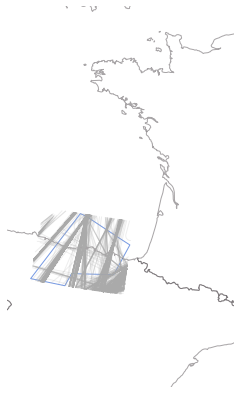

In [80]:
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP
from traffic.data import nm_airspaces
from traffic.drawing import countries
with plt.style.context("traffic"):
    fig, ax = plt.subplots(
        subplot_kw=dict(projection=EuroPP()))
    nm_airspaces['LECMBLU'].plot(ax,alpha = 1)
    ax.add_feature(countries())
    ax.set_extent((-6, 1, 40, 50))
    
    
    v_filtrado.plot(ax,alpha = 0.2)
    
    


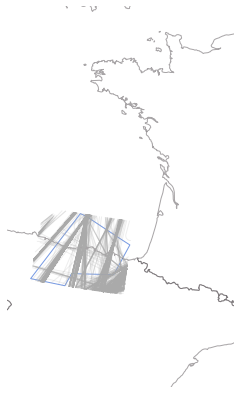

In [82]:
def representartrayectoria(traffic_data,sector ='LECMBLU'):
    # esta funcion representa las trayectorias dentro de la BBDD sobre el sector que se estudiar
    import matplotlib.pyplot as plt
    from traffic.core.projection import EuroPP
    from traffic.data import nm_airspaces
    from traffic.drawing import countries
    with plt.style.context("traffic"):
        fig, ax = plt.subplots(
            subplot_kw=dict(projection=EuroPP()))
        nm_airspaces[sector].plot(ax,alpha = 1)
        ax.add_feature(countries())
        ax.set_extent((-6, 1, 40, 50))
        traffic_data.plot(ax,alpha = 0.2)

representartrayectoria(v_filtrado)

In [ ]:



from traffic.core.projection import EuroPP
from traffic.drawing import countries
with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())